In [114]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [115]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
eye_classifier = cv2.CascadeClassifier("frontalEyes35x16.xml")
nose_classifier = cv2.CascadeClassifier("Nose18x15.xml")

In [116]:
jamie = cv2.imread("Before.png")

In [117]:
# cv2.imshow("Jamie Before",jamie)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [118]:
eye = eye_classifier.detectMultiScale(jamie,1.1,5)
eye = eye[0]

In [119]:
x,y,h,w = eye

In [120]:
# jamie = cv2.rectangle(jamie,(x,y),(x+w,y+h),(255,255,255),2)

In [121]:
# cv2.imshow("Jamie Before",jamie)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [122]:
glasses = cv2.imread("glasses.png",-1)
glasses = cv2.resize(glasses,(w,h))
glass = glasses[:,:,[0,1,2]]

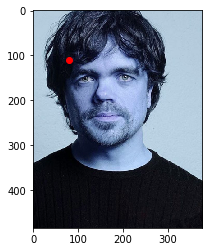

In [123]:
plt.imshow(jamie)
plt.scatter(x,y,color="red")
plt.show()

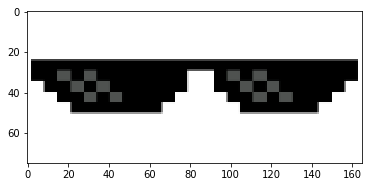

In [124]:
plt.imshow(glasses)
plt.show()

In [125]:
print(glass.shape)
print(glasses.shape)

(75, 165, 3)
(75, 165, 4)


In [126]:
	
print(w,h)

165 75


In [127]:
for i in range(h):
    for j in range(w):
        if glasses[i,j,3]>0:
            jamie[y+i+4][x+j] = glass[i][j]

In [128]:
cv2.imshow("Jamie Before",jamie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
noses = nose_classifier.detectMultiScale(jamie,1.2,5)
print(noses)
nose = noses[0]
x,y,h,w = nose
x+=4
h+=12

[[126 170  46  56]]


In [130]:
# jamie = cv2.rectangle(jamie,(x,y),(x+w,y+h),(255,255,255),2)

In [131]:
# cv2.imshow("Jamie Before",jamie)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [132]:
moustache = cv2.imread("mustache.png",-1)
print(w,h)

56 58


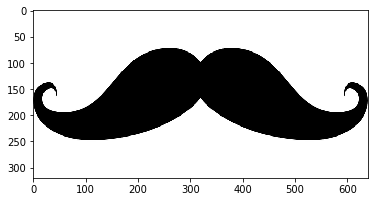

In [133]:
plt.imshow(moustache)
plt.show()

In [134]:
moustache = cv2.resize(moustache,(w,int(0.75*(h+12))))

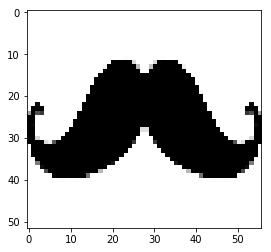

In [135]:
plt.imshow(moustache)
plt.show()

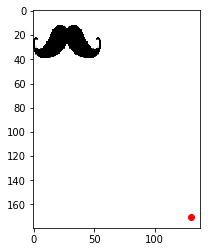

In [136]:
plt.imshow(moustache)
plt.scatter(x,y,color="red")
plt.show()

In [137]:
moustache = moustache[12:40,:]

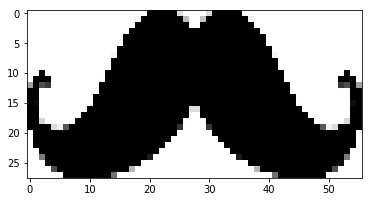

In [138]:
plt.imshow(moustache)
plt.show()

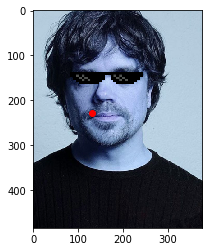

In [139]:
plt.imshow(jamie)
plt.scatter(x,y+h,color="red")
plt.show()

In [140]:
mustache = moustache[:,:,[0,1,2]]
print(x,y+h+12)
print(mustache.shape)
print(w,h)

130 240
(28, 56, 3)
56 58


In [141]:
for i in range(mustache.shape[0]):
    for j in range(mustache.shape[1]):
        if moustache[i,j,3]>0:
            jamie[y+h-i][x+j] = mustache[i][j]

In [142]:
cv2.imshow("Jamie After",jamie)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [143]:
jamie = cv2.cvtColor(jamie,cv2.COLOR_BGR2RGB)

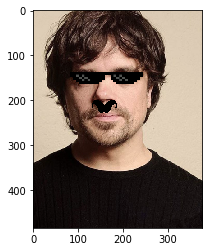

In [144]:
plt.imshow(jamie)
plt.show()

In [145]:
import pandas as pd

In [146]:
jamie = np.reshape(jamie,(-1,3))
print(jamie.shape)

(182845, 3)


In [147]:
df = pd.DataFrame(data=jamie,columns=['Channel 1','Channel 2','Channel 3'])

In [148]:
df.to_csv("submit1.csv",index=False)